In [5]:
import pandas as pd

df = pd.read_csv("clean_train.csv")
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded,Age_categorized
0,0,0,3,male,22.0,1,0,7.2500,S,1,2,2
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,2
2,2,1,3,female,26.0,0,0,7.9250,S,0,2,2
3,3,1,1,female,35.0,1,0,53.1000,S,0,2,2
4,4,0,3,male,35.0,0,0,8.0500,S,1,2,2


In [6]:
df1 = df[["Pclass", "SibSp", "Parch","Sex_encoded", "Embarked_encoded", "Age_categorized", "Survived"]]

# Correlation using heatmap

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})

<AxesSubplot:>

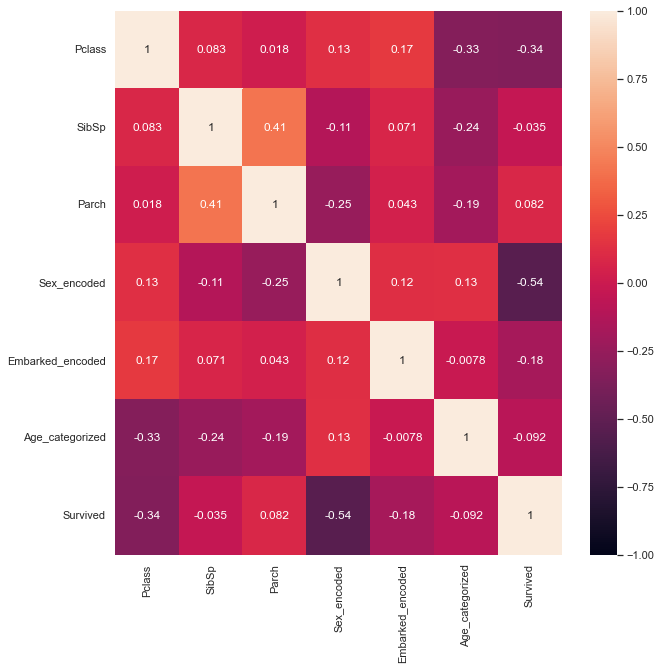

In [8]:
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1)

## Observations:

- ``Survival`` is moderately correlated to ``PClass``, ``Sex_encoded`` and slightly correlated to ``Embarked_encoded``. Surprisingly ``Age_categorized`` is not correlated to ``Survival`` at all.
- ``Age_encoded`` has some correlation with ``PClass`` and slight correlation with ``SibSp`` and ``Parch``.
- ``Sex_encoded`` has moderate correlation with ``Parch``.
- ``Parch`` has moderate correlation with ``SibSp``.

# Top 3 features

``Sex_encoded``, ``Age`` and ``Pclass`` are the top 3 features which decide if the passenger survives or not

In [9]:
import matplotlib.pyplot as plt

In [10]:
df_survived = df[df["Survived"] == 1]
df_dead = df[df["Survived"] == 0]

df_survived_male = df_survived[df_survived["Sex_encoded"] == 1]
df_survived_female = df_survived[df_survived["Sex_encoded"] == 0]

df_dead_male = df_dead[df_dead["Sex_encoded"] == 1]
df_dead_female = df_dead[df_dead["Sex_encoded"] == 0]

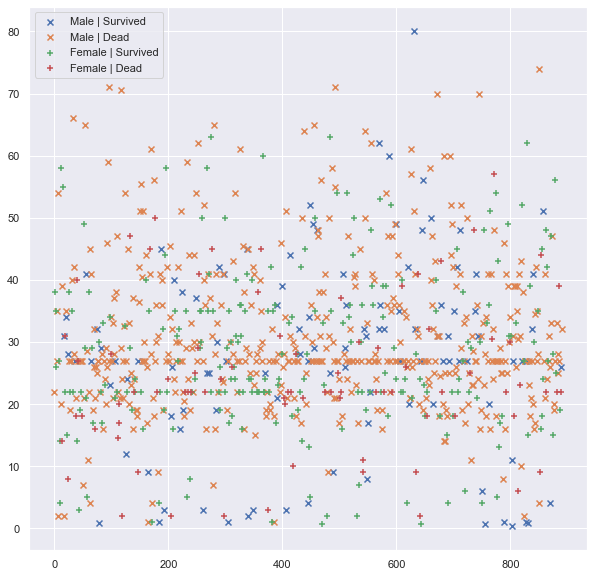

In [11]:
plt.scatter(df_survived_male.index, df_survived_male["Age"], marker="x", label="Male | Survived")
plt.scatter(df_dead_male.index, df_dead_male["Age"], marker="x", label="Male | Dead")
plt.scatter(df_survived_female.index, df_survived_female["Age"], marker="+", label="Female | Survived")
plt.scatter(df_dead_female.index, df_dead_female["Age"], marker="+", label="Female | Dead")
plt.legend()
plt.show()

In [51]:
print(f"""
Total: {len(df)}
Men: {len(df[df["Sex_encoded"] == 1])}
Women: {len(df[df["Sex_encoded"] == 0])}

Survived: {len(df_survived)}
Men: {len(df_survived_male)}
Women: {len(df_survived_female)}

Dead: {len(df_dead)}
Men: {len(df_dead_male)}
Women: {len(df_dead_female)}
""")


Total: 891
Men: 577
Women: 314

Survived: 342
Men: 109
Women: 233

Dead: 549
Men: 468
Women: 81



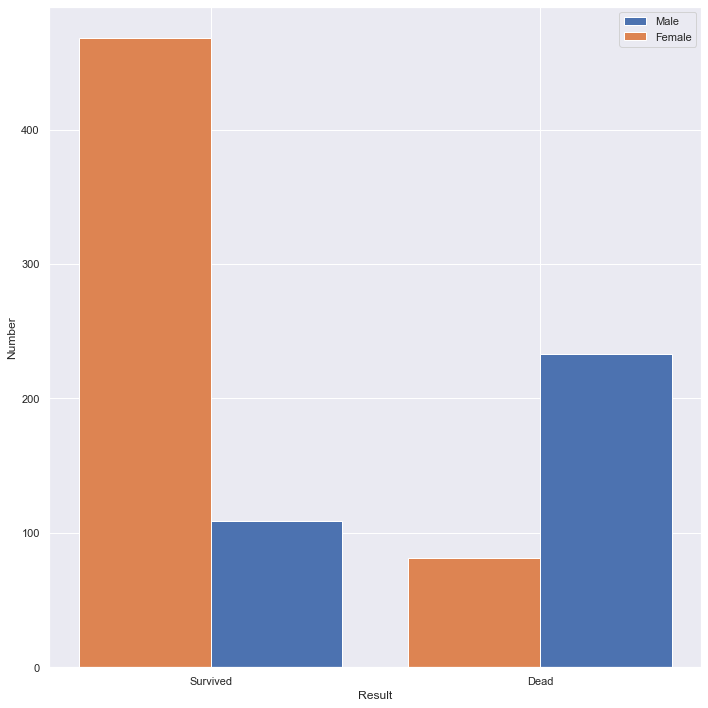

In [50]:
import numpy as np

x = np.arange(1, 3)
y1 = [len(df_survived_male), len(df_survived_female)]
y2 = [len(df_dead_male), len(df_dead_female)]
plt.ylabel("Number")
plt.xlabel("Result")
width = 0.40
plt.xticks(x, ["Survived", "Dead"])
plt.bar(x+0.2, y1, width=0.40, label="Male")
plt.bar(x-0.2, y2, width=0.40, label="Female")
plt.legend()
plt.tight_layout()
plt.show()

![](sankey.png)